In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy

In [2]:
with open('./ASTR19_S22_group_project_data.txt', 'r') as file:
    data = file.read()

In [3]:
def parse_tide_data(data):
    rows = []
    for line in data.split('\n'):
        parts = line.split()
        if len(parts) == 3:
            day, time, height = parts
            rows.append({'Day': int(day), 'Time': time, 'Tide Height (feet)': float(height)})
    return pd.DataFrame(rows)

In [4]:
df = parse_tide_data(data)
print(df['Time'])

0      8:07
1     15:37
2      8:55
3     16:25
4      9:45
      ...  
77    11:15
78     4:29
79    12:22
80     5:21
81    13:14
Name: Time, Length: 82, dtype: object


In [6]:
from scipy.optimize import curve_fit

In [7]:
# function that we have to fit the parameters to
def oscillatory_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

In [8]:
# converting time and hours to a decimal point
def time_to_hours(t):
    hours, minutes = map(int, t.split(':'))
    return hours + minutes / 60

In [10]:
df['Time (Hours)'] = df['Time'].apply(time_to_hours)

In [26]:
df['Time (Hours)'].head()

0     8.116667
1    15.616667
2     8.916667
3    16.416667
4     9.750000
Name: Time (Hours), dtype: float64

In [14]:
# creating a standardized timestamp that can be plotted on the x-axis
df['Timepoint'] = df['Day'] + df['Time (Hours)'] / 24
df['Timepoint'].head()

0    1.338194
1    1.650694
2    2.371528
3    2.684028
4    3.406250
Name: Timepoint, dtype: float64

In [15]:
# initial guesses for the parameters in the oscillatory func, these will be updated by the curve_fit function
initial_guess = [5, 0.5, 0, 0]

In [16]:
params, _ = curve_fit(oscillatory_function, df['Timepoint'], df['Tide Height (feet)'],
                      p0=initial_guess, sigma=np.full(len(df), 0.25))

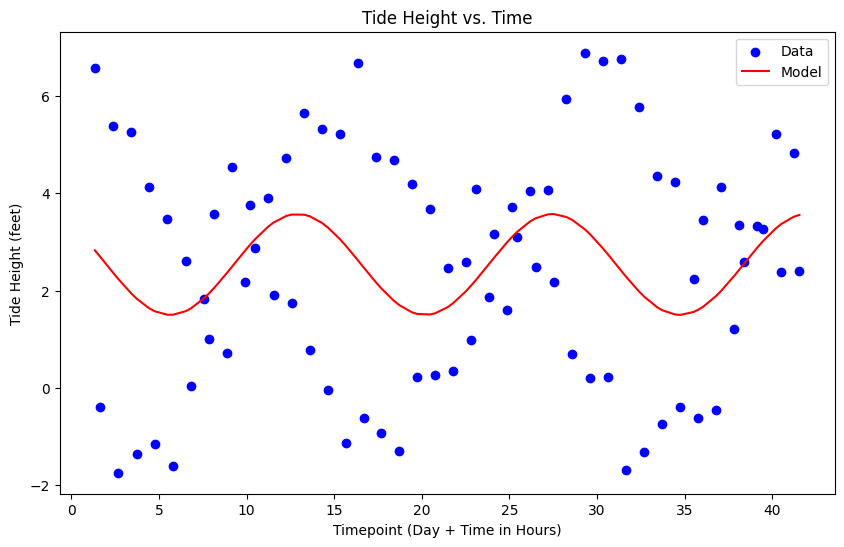

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Timepoint'], df['Tide Height (feet)'], label='Data', color='blue')
plt.plot(df['Timepoint'], oscillatory_function(df['Timepoint'], *params), label='Model', color='red')

plt.xlabel('Timepoint (Day + Time in Hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height vs. Time')
plt.legend()

plt.savefig('./figures/tide_height_model.pdf')